## 연습문제 Day 1

- 2021년 한국프로야구 타자 스탯 데이터를 읽고, 기술통계 분석과 데이터 시각화를 실행합니다.
- url : https://bit.ly/KBO_Hitters_2021 (인코딩방식: EUC-KR)

### 실습 데이터셋 준비

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import numpy as np
import pandas as pd
from scipy import stats
import joblib

In [2]:
# 온라인으로 공유 중인 csv 파일 주소를 URL에 할당합니다.
URL = 'https://bit.ly/KBO_Hitters_2021'

In [3]:
# URL을 읽고, 데이터프레임 kbo를 생성합니다.
# [힌트] pd.read_csv() 함수를 사용하세요.
kbo = pd.read_csv(URL, encoding = 'EUC-KR')

In [4]:
# kbo의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
kbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     300 non-null    object 
 1   팀명      300 non-null    object 
 2   경기      300 non-null    int64  
 3   타석      300 non-null    int64  
 4   타수      300 non-null    int64  
 5   안타      300 non-null    int64  
 6   홈런      300 non-null    int64  
 7   득점      300 non-null    int64  
 8   타점      300 non-null    int64  
 9   볼넷      300 non-null    int64  
 10  삼진      300 non-null    int64  
 11  도루      300 non-null    int64  
 12  BABIP   300 non-null    object 
 13  타율      300 non-null    float64
 14  출루율     300 non-null    float64
 15  장타율     300 non-null    float64
 16  OPS     300 non-null    float64
 17  wOBA    300 non-null    float64
 18  WAR     300 non-null    float64
dtypes: float64(6), int64(10), object(3)
memory usage: 44.7+ KB


In [5]:
# kbo의 처음 10행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
kbo.head(n = 10)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.10
1,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.06
2,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.97
3,최정,SSG,134,555,436,121,35,92,100,84,102,8,0.277,0.278,0.410,0.562,0.972,0.425,6.83
4,양의지,NC,141,570,480,156,30,81,111,69,60,2,0.315,0.325,0.414,0.581,0.995,0.432,6.48
5,알테어,NC,143,565,492,134,32,83,84,57,156,20,0.331,0.272,0.358,0.514,0.872,0.384,4.89
6,전준우,롯데,144,619,552,192,7,88,92,53,71,6,0.384,0.348,0.405,0.469,0.874,0.395,4.86
7,구자욱,삼성,139,610,543,166,22,107,88,48,98,27,0.331,0.306,0.361,0.519,0.880,0.382,4.48
8,정은원,한화,139,608,495,140,6,85,39,105,105,19,0.346,0.283,0.407,0.384,0.791,0.376,4.41
9,추신수,SSG,137,580,461,122,21,84,69,103,123,25,0.315,0.265,0.409,0.451,0.860,0.396,4.30


In [6]:
# 경기가 50 이상인 행만 남겨서 kbo에 재할당합니다.
# [힌트] ge(), copy() 함수를 사용하세요.
kbo = kbo[kbo['경기'].ge(50)]

In [7]:
# kbo의 행 개수를 출력합니다. 출력 결과는 156이어야 합니다.
# [힌트] shape 속성의 첫 번째 원소를 인덱싱해보세요.
kbo.shape[0]

156

In [8]:
# 팀명이 '두산', '롯데', '삼성', 'SSG', 'KT'면 True, 
# 아니면 False인 부울형 시리즈 locs를 생성합니다.
# [힌트] isin() 함수를 사용하세요.
locs = kbo['팀명'].isin(values = ['두산', '롯데', '삼성', 'SSG', 'KT'])

In [9]:
# locs를 출력합니다.
locs

0      False
1      False
2       True
3       True
4      False
       ...  
289     True
290    False
292    False
295    False
296    False
Name: 팀명, Length: 156, dtype: bool

In [10]:
# locs에서 True의 개수를 출력합니다. 출력 결과는 77이어야 합니다.
# [힌트] sum() 함수를 사용하세요.
locs.sum()

77

In [11]:
# locs가 True면 '드림', False면 '나눔'인 문자열 시리즈를 
# kbo의 오른쪽 끝에 올스타팀이라는 열이름으로 추가합니다.
# [힌트] np.where() 함수를 사용하세요.
kbo['올스타팀'] = np.where(locs, '드림', '나눔')

In [12]:
# 올스타팀의 범주별 빈도수를 출력합니다.
# [힌트] value_counts() 함수를 사용하세요.
kbo['올스타팀'].value_counts()

나눔    79
드림    77
Name: 올스타팀, dtype: int64

### 데이터 시각화

In [13]:
# 시각화 관련 모듈을 호출합니다.
from GraphicSetting import *
import HelloDataScience as hds

In [14]:
# 기본 팔레트를 'Set1'으로 변경합니다.
sns.set_palette(palette = 'Set1', n_colors = 9)

In [15]:
# 기본 팔레트 색을 출력합니다.
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [16]:
# OPS의 최솟값과 최댓값을 확인합니다.
# [힌트] describe() 함수를 사용하고,
# 최솟값과 최댓값만 출력하도록 팬시 인덱싱하세요.
kbo['OPS'].describe()[['min', 'max']]

min    0.167
max    0.995
Name: OPS, dtype: float64

In [17]:
# 히스토그램의 계급을 설정합니다.
# [힌트] np.arange() 함수를 사용하세요.
# 계급의 시작은 0이고, 끝은 1을 포함해야 하고, 
# 계급의 간격은 0.1로 설정하세요.
bins = np.arange(0, 1.1, 0.1)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

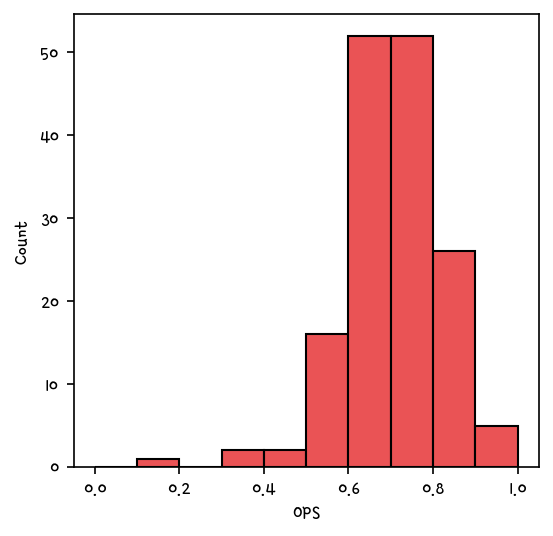

In [19]:
# OPS로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# sns.histplot(data = kbo, x = 'OPS', bins = bins);
sns.histplot(data = kbo, x = 'OPS', bins = 10, binrange = (0, 1));

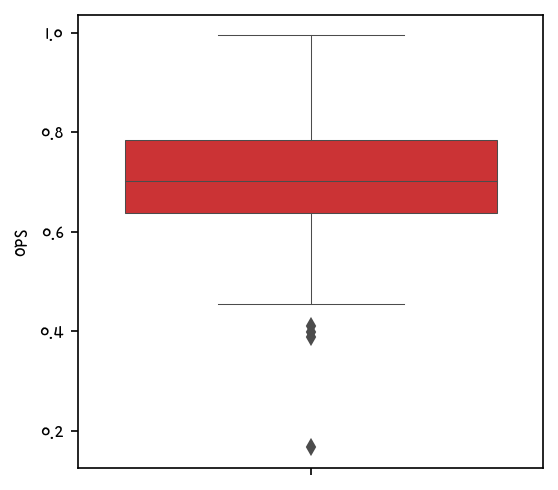

In [20]:
# OPS로 상자 수염 그림을 세워서 그립니다.
# [힌트] sns.boxplot() 함수를 사용하세요.
sns.boxplot(data = kbo, y = 'OPS');

In [22]:
# OPS 하위 4명을 출력합니다.
# [힌트] sort_values(), tail() 함수를 차례대로 사용하세요.
kbo.sort_values(by = ['OPS'], ascending = False).tail(n = 4)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,올스타팀
257,김규성,KIA,54,41,36,5,0,8,2,5,17,0,0.263,0.139,0.244,0.167,0.411,0.215,-0.35,나눔
292,이도윤,한화,56,68,63,11,0,5,2,4,18,1,0.244,0.175,0.224,0.175,0.399,0.197,-0.72,나눔
265,구본혁,LG,123,45,38,5,0,10,3,3,7,0,0.152,0.132,0.205,0.184,0.389,0.191,-0.41,나눔
259,박정음,Hero,70,18,14,0,0,19,1,2,3,4,0.0,0.000,0.167,0.000,0.167,0.130,-0.36,나눔


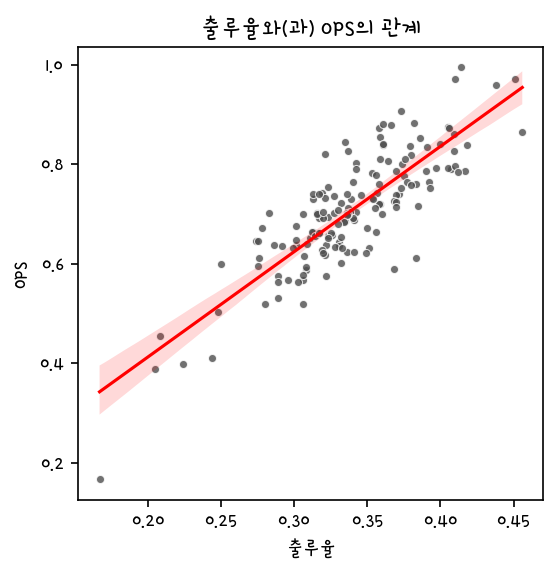

In [23]:
# 출루율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression(data = kbo, x = '출루율', y = 'OPS')

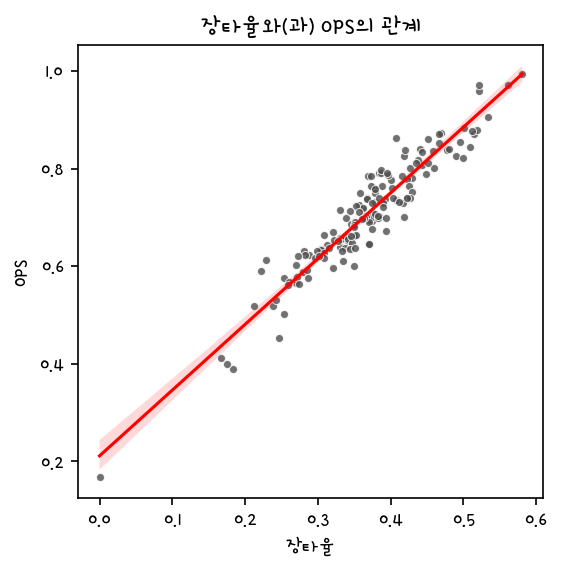

In [24]:
# 장타율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression(data = kbo, x = '장타율', y = 'OPS')

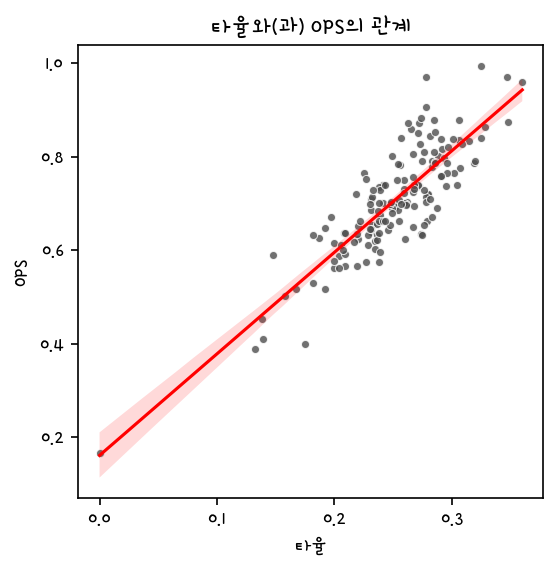

In [25]:
# 타율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression(data = kbo, x = '타율', y = 'OPS')

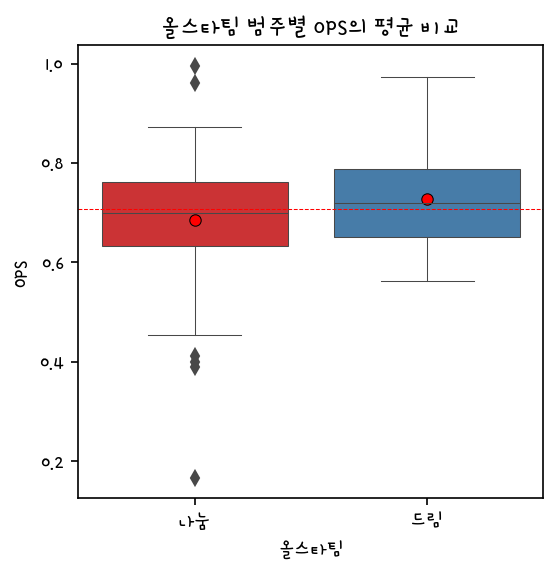

In [26]:
# 올스타팀의 범주별 OPS의 분포를 비교합니다.
# [힌트] hds.plot_box_group() 함수를 사용하세요.
hds.plot_box_group(data = kbo, x = '올스타팀', y = 'OPS')

### 기술통계 분석

In [27]:
# OPS의 평균을 출력합니다.
# [힌트] mean() 함수를 사용하세요.
kbo['OPS'].mean()

0.7065448717948718

In [28]:
# OPS의 5% 절사평균을 출력합니다.
# [힌트] stats.trim_mean() 함수를 사용하세요.
stats.trim_mean(kbo['OPS'], 0.05)

0.709943661971831

In [29]:
# OPS의 중위수를 출력합니다.
# [힌트] median() 함수를 사용하세요.
kbo['OPS'].median()

0.703

In [30]:
# OPS의 범위를 출력합니다.
# [힌트] quantile(), diff() 함수를 차례대로 사용하고, 
# diff() 함수의 마지막 원소를 인덱싱하세요.
kbo['OPS'].quantile([0, 1]).diff().iloc[-1]

0.828

In [31]:
# OPS의 사분위수를 출력합니다.
# [힌트] quantile(), diff() 함수를 차례대로 사용하고, 
# diff() 함수의 마지막 원소를 인덱싱하세요.
kbo['OPS'].quantile([0.25, 0.75]).diff().iloc[-1]

0.14749999999999996

In [32]:
# OPS의 분산을 출력합니다.
# [힌트] var() 함수를 사용하세요.
kbo['OPS'].var()

0.013513243134822167

In [33]:
# OPS의 표준편차를 출력합니다.
# [힌트] std() 함수를 사용하세요.
kbo['OPS'].std()

0.11624647579527805

### z 파일로 저장

In [34]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/PythonAdvanced-main/exercise'

In [35]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [36]:
# kbo를 z 파일로 저장합니다.
# 파일명은 'KBO_Hitter_2021.z'로 설정합니다.
# [힌트] joblib.dump() 함수를 사용하세요.
joblib.dump(value = kbo, filename = 'KBO_Hitter_2021.z')

['KBO_Hitter_2021.z']

In [37]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price_Prep.z',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv']

## End of Document